In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset obtained from the UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen

In [26]:
data = pd.read_csv("house-votes-84.data" ) 
data.columns= ['party', 'infants', 'water', 'budget', 'physician', 
               'salvador','religious', 'satellite', 'aid', 'missile',
               'immigration', 'synfuels','education', 'superfund', 
               'crime', 'duty_free_exports','eaa_rsa']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              434 non-null    object
 1   infants            434 non-null    object
 2   water              434 non-null    object
 3   budget             434 non-null    object
 4   physician          434 non-null    object
 5   salvador           434 non-null    object
 6   religious          434 non-null    object
 7   satellite          434 non-null    object
 8   aid                434 non-null    object
 9   missile            434 non-null    object
 10  immigration        434 non-null    object
 11  synfuels           434 non-null    object
 12  education          434 non-null    object
 13  superfund          434 non-null    object
 14  crime              434 non-null    object
 15  duty_free_exports  434 non-null    object
 16  eaa_rsa            434 non-null    object
dt

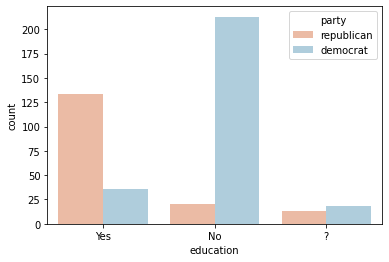

In [25]:
plt.figure()
sns.countplot(x='education', hue='party', data=data, palette='RdBu')
plt.xticks([0,1, 2], ['Yes', 'No', '?'])
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = data['party'].values
X = data.drop('party', axis=1).values
X = X=='y'

In [37]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)
X_pedict=knn.predict(X)

# MODEL COMPLEX

Larger k = smoother decision boundary = less complex model

Smaller K = more complex model = can lead to overfitting 

# MNIST digits recognition dataset

In [52]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 


# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

(1797, 8, 8)
(1797, 64)


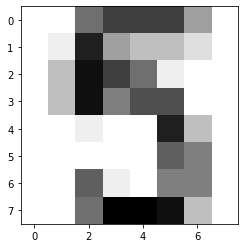

In [53]:
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [54]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [55]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.9833333333333333


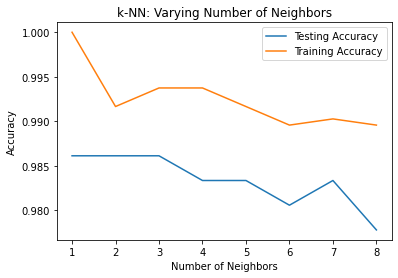

In [56]:
import numpy as np
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()